# AC POWER CONSUMPTION ANALYSIS

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [184]:
df = pd.read_csv('AC_Data.csv')
df.head(6)

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1  2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3  2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
4  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   
5  2019-08-01 00:05:00       NaN       NaN   NaN   NaN       NaN       NaN   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   
5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
1       NaN       NaN       NaN       NaN       NaN  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
3       NaN       NaN       NaN       NaN       NaN  
4  2.676861  3.539026  3.797881  3.131560  6.363475  
5       NaN       NaN       NaN       NaN       NaN

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


**Let's get some descriptive statistics.**

In [186]:
df.describe()

AC 1          AC 2          AC 3          AC 4          AC 5  \
count  43708.000000  43711.000000  43713.000000  43704.000000  43716.000000   
mean       2.379368      3.868892      2.568411      2.395158      1.421699   
std        2.276782      2.545147      1.487508      1.797529      0.767218   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.123263      1.706508      1.258299      0.970744   
50%        2.094330      3.791752      2.486992      2.308961      1.380183   
75%        3.661752      5.460892      3.441527      3.476123      1.870234   
max       11.194789     11.147141      8.430909      9.879500      5.495358   

               AC 6          AC 7          AC 8          AC 9         AC 10  \
count  43717.000000  43679.000000  43704.000000  43654.000000  43690.000000   
mean       2.518138      2.980883      2.548711      3.184382      1.538344   
std        1.655560      1.473498      1.504482      1.522291      0.685461   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.543779      2.190803      1.766230      2.294635      1.117139   
50%        2.665063      3.005071      2.608551      3.082134      1.504554   
75%        3.616988      3.897857      3.496358      4.096374      1.963707   
max        9.929291      9.356776      9.331506     10.026747      4.625030   

              AC 11         AC 12         AC 13         AC 14         AC 15  \
count  43670.000000  43713.000000  43719.000000  43696.000000  43715.000000   
mean       2.406141      2.699639      4.279893      2.917122      4.046283   
std        1.554481      1.436087      1.847168      1.454946      2.016898   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.591748      1.949729      3.260674      1.852981      3.023501   
50%        2.351361      2.727152      4.217381      2.787084      4.001279   
75%        3.254937      3.566744      5.379832      3.824467      5.260193   
max       10.363151      9.887306      9.796393      9.054969     10.349998   

              AC 16         AC 17         AC 18  
count  43710.000000  43714.000000  43723.000000  
mean       2.800050      4.218979      6.462676  
std        1.606239      1.125491      2.319242  
min        0.000000      0.000000      0.000000  
25%        1.877626      3.752478      4.013579  
50%        2.673698      4.611434      7.131194  
75%        3.695294      4.958306      8.314639  
max       10.654430      5.950261     11.040031

In [187]:
df.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

**By observing above data carefully we came to the conclusioin that there are many null values,
so we need to treat them as it will create biases in our analyis**

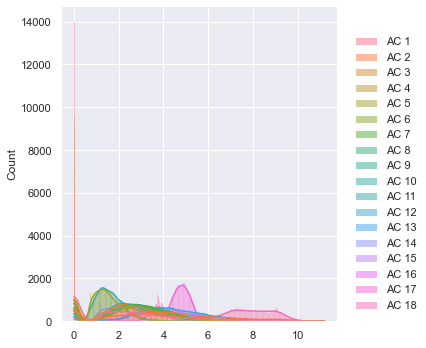

In [188]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.displot(df, kde = True)

From above we can assume that our dataset is normally distributed. So we will to fill the NULL values with **Mean**.

In [189]:
df1 = df.copy()
df1.head()

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1  2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3  2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
4  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
1       NaN       NaN       NaN       NaN       NaN  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
3       NaN       NaN       NaN       NaN       NaN  
4  2.676861  3.539026  3.797881  3.131560  6.363475

In [190]:
df1 = df1.fillna(df1.mean())

In [191]:
df1.head()

0      AC 1      AC 2      AC 3      AC 4      AC 5  \
0  2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
1  2019-08-01 00:01:00  2.379368  3.868892  2.568411  2.395158  1.421699   
2  2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
3  2019-08-01 00:03:00  2.379368  3.868892  2.568411  2.395158  1.421699   
4  2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   

       AC 6      AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
0  4.079041  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373   
1  2.518138  2.980883  2.548711  3.184382  1.538344  2.406141  2.699639   
2  3.781231  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730   
3  2.518138  2.980883  2.548711  3.184382  1.538344  2.406141  2.699639   
4  3.800127  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409   

      AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  
0  3.142941  2.749470  5.417774  4.113460  3.305072  6.735981  
1  4.279893  2.917122  4.046283  2.800050  4.218979  6.462676  
2  3.085110  2.720484  3.302422  3.986483  3.220588  6.379500  
3  4.279893  2.917122  4.046283  2.800050  4.218979  6.462676  
4  3.132799  2.676861  3.539026  3.797881  3.131560  6.363475

In [192]:
df1.describe()

AC 1          AC 2          AC 3          AC 4          AC 5  \
count  87840.000000  87840.000000  87840.000000  87840.000000  87840.000000   
mean       2.379368      3.868892      2.568411      2.395158      1.421699   
std        1.606029      1.795393      1.049339      1.267908      0.541241   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.107633      3.806399      2.495116      2.318021      1.383696   
50%        2.379368      3.868892      2.568411      2.395158      1.421699   
75%        2.379368      3.868892      2.568411      2.395158      1.421699   
max       11.194789     11.147141      8.430909      9.879500      5.495358   

               AC 6          AC 7          AC 8          AC 9         AC 10  \
count  87840.000000  87840.000000  87840.000000  87840.000000  87840.000000   
mean       2.518138      2.980883      2.548711      3.184382      1.538344   
std        1.167942      1.039052      1.061204      1.073151      0.483420   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.518138      2.980883      2.548711      3.093890      1.508463   
50%        2.518138      2.980883      2.548711      3.184382      1.538344   
75%        2.656701      2.996157      2.601819      3.184382      1.538344   
max        9.929291      9.356776      9.331506     10.026747      4.625030   

              AC 11         AC 12         AC 13         AC 14         AC 15  \
count  87840.000000  87840.000000  87840.000000  87840.000000  87840.000000   
mean       2.406141      2.699639      4.279893      2.917122      4.046283   
std        1.096045      1.013066      1.303146      1.026169      1.422822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.358842      2.699639      4.223895      2.796519      4.010262   
50%        2.406141      2.699639      4.279893      2.917122      4.046283   
75%        2.406141      2.719761      4.279893      2.917122      4.046283   
max       10.363151      9.887306      9.796393      9.054969     10.349998   

              AC 16         AC 17         AC 18  
count  87840.000000  87840.000000  87840.000000  
mean       2.800050      4.218979      6.462676  
std        1.133057      0.793969      1.636260  
min        0.000000      0.000000      0.000000  
25%        2.683071      4.218979      6.462676  
50%        2.800050      4.218979      6.462676  
75%        2.800050      4.607963      7.120772  
max       10.654430      5.950261     11.040031

In [193]:
df.describe()

AC 1          AC 2          AC 3          AC 4          AC 5  \
count  43708.000000  43711.000000  43713.000000  43704.000000  43716.000000   
mean       2.379368      3.868892      2.568411      2.395158      1.421699   
std        2.276782      2.545147      1.487508      1.797529      0.767218   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.123263      1.706508      1.258299      0.970744   
50%        2.094330      3.791752      2.486992      2.308961      1.380183   
75%        3.661752      5.460892      3.441527      3.476123      1.870234   
max       11.194789     11.147141      8.430909      9.879500      5.495358   

               AC 6          AC 7          AC 8          AC 9         AC 10  \
count  43717.000000  43679.000000  43704.000000  43654.000000  43690.000000   
mean       2.518138      2.980883      2.548711      3.184382      1.538344   
std        1.655560      1.473498      1.504482      1.522291      0.685461   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.543779      2.190803      1.766230      2.294635      1.117139   
50%        2.665063      3.005071      2.608551      3.082134      1.504554   
75%        3.616988      3.897857      3.496358      4.096374      1.963707   
max        9.929291      9.356776      9.331506     10.026747      4.625030   

              AC 11         AC 12         AC 13         AC 14         AC 15  \
count  43670.000000  43713.000000  43719.000000  43696.000000  43715.000000   
mean       2.406141      2.699639      4.279893      2.917122      4.046283   
std        1.554481      1.436087      1.847168      1.454946      2.016898   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.591748      1.949729      3.260674      1.852981      3.023501   
50%        2.351361      2.727152      4.217381      2.787084      4.001279   
75%        3.254937      3.566744      5.379832      3.824467      5.260193   
max       10.363151      9.887306      9.796393      9.054969     10.349998   

              AC 16         AC 17         AC 18  
count  43710.000000  43714.000000  43723.000000  
mean       2.800050      4.218979      6.462676  
std        1.606239      1.125491      2.319242  
min        0.000000      0.000000      0.000000  
25%        1.877626      3.752478      4.013579  
50%        2.673698      4.611434      7.131194  
75%        3.695294      4.958306      8.314639  
max       10.654430      5.950261     11.040031

*By comparing above dataframes we can clearly conclude that there are  several changes in our data description. One clearly observable point is we can observe a change in 25% percentile of 'AC 1'*

In [194]:
sums = df1.select_dtypes(pd.np.number).sum().rename('Total')
df1.append(sums)

0           AC 1           AC 2           AC 3  \
0      2019-08-01 00:00:00       7.518632       8.788315       0.000000   
1      2019-08-01 00:01:00       2.379368       3.868892       2.568411   
2      2019-08-01 00:02:00       7.426114       8.940615       0.000000   
3      2019-08-01 00:03:00       2.379368       3.868892       2.568411   
4      2019-08-01 00:04:00       7.052986       9.161103       0.000000   
...                    ...            ...            ...            ...   
87836  2019-09-30 23:56:00       2.379368       3.868892       2.568411   
87837  2019-09-30 23:57:00       1.209176       6.152532       2.211421   
87838  2019-09-30 23:58:00       2.379368       3.868892       2.568411   
87839  2019-09-30 23:59:00       1.430442       6.078281       1.891162   
Total                  NaN  209003.698094  339843.492842  225609.236304   

                AC 4           AC 5           AC 6           AC 7  \
0           0.000000       2.617045       4.079041       2.782276   
1           2.395158       1.421699       2.518138       2.980883   
2           0.000000       2.581625       3.781231       2.529366   
3           2.395158       1.421699       2.518138       2.980883   
4           0.000000       2.592095       3.800127       2.332304   
...              ...            ...            ...            ...   
87836       2.395158       1.421699       2.518138       2.980883   
87837       0.000000       1.448103       0.000000       3.151248   
87838       2.395158       1.421699       2.518138       2.980883   
87839       0.000000       1.577491       4.364239       3.126339   
Total  210390.718992  124882.068630  221193.227793  261840.804502   

                AC 8           AC 9          AC 10          AC 11  \
0           4.624447       5.222060       2.151238       1.585072   
1           2.548711       3.184382       1.538344       2.406141   
2           5.057423       5.349465       2.414715       2.168184   
3           2.548711       3.184382       1.538344       2.406141   
4           6.322521       3.995392       2.237114       3.345624   
...              ...            ...            ...            ...   
87836       2.548711       3.184382       1.538344       2.406141   
87837       2.871690       3.417942       2.185493       5.174168   
87838       2.548711       3.184382       1.538344       2.406141   
87839       3.287224       3.986978       2.013912       4.821829   
Total  223878.755492  279716.139558  135128.093983  211355.450838   

               AC 12          AC 13          AC 14          AC 15  \
0           0.560373       3.142941       2.749470       5.417774   
1           2.699639       4.279893       2.917122       4.046283   
2           1.818730       3.085110       2.720484       3.302422   
3           2.699639       4.279893       2.917122       4.046283   
4           2.310409       3.132799       2.676861       3.539026   
...              ...            ...            ...            ...   
87836       2.699639       4.279893       2.917122       4.046283   
87837       2.772349       3.786657       2.060023       4.057525   
87838       2.699639       4.279893       2.917122       4.046283   
87839       3.363855       3.380110       1.949240       4.026304   
Total  237136.252360  375945.778873  256239.994189  355425.494861   

               AC 16          AC 17          AC 18  
0           4.113460       3.305072       6.735981  
1           2.800050       4.218979       6.462676  
2           3.986483       3.220588       6.379500  
3           2.800050       4.218979       6.462676  
4           3.797881       3.131560       6.363475  
...              ...            ...            ...  
87836       2.800050       4.218979       6.462676  
87837       1.870886       2.991946       7.134647  
87838       2.800050       4.218979       6.462676  
87839       1.862166       3.009434       7.179719  
Total  245956.411652  370595.144276  567681.432513  



# Which AC was used the most/least? 

In [195]:
df1.loc['Total'] = df1.select_dtypes(pd.np.number).sum()

In [196]:
df1.tail()

0           AC 1           AC 2           AC 3  \
87836  2019-09-30 23:56:00       2.379368       3.868892       2.568411   
87837  2019-09-30 23:57:00       1.209176       6.152532       2.211421   
87838  2019-09-30 23:58:00       2.379368       3.868892       2.568411   
87839  2019-09-30 23:59:00       1.430442       6.078281       1.891162   
Total                  NaN  209003.698094  339843.492842  225609.236304   

                AC 4           AC 5           AC 6           AC 7  \
87836       2.395158       1.421699       2.518138       2.980883   
87837       0.000000       1.448103       0.000000       3.151248   
87838       2.395158       1.421699       2.518138       2.980883   
87839       0.000000       1.577491       4.364239       3.126339   
Total  210390.718992  124882.068630  221193.227793  261840.804502   

                AC 8           AC 9          AC 10          AC 11  \
87836       2.548711       3.184382       1.538344       2.406141   
87837       2.871690       3.417942       2.185493       5.174168   
87838       2.548711       3.184382       1.538344       2.406141   
87839       3.287224       3.986978       2.013912       4.821829   
Total  223878.755492  279716.139558  135128.093983  211355.450838   

               AC 12          AC 13          AC 14          AC 15  \
87836       2.699639       4.279893       2.917122       4.046283   
87837       2.772349       3.786657       2.060023       4.057525   
87838       2.699639       4.279893       2.917122       4.046283   
87839       3.363855       3.380110       1.949240       4.026304   
Total  237136.252360  375945.778873  256239.994189  355425.494861   

               AC 16          AC 17          AC 18  
87836       2.800050       4.218979       6.462676  
87837       1.870886       2.991946       7.134647  
87838       2.800050       4.218979       6.462676  
87839       1.862166       3.009434       7.179719  
Total  245956.411652  370595.144276  567681.432513

**Hereby considering all the ac's are of same capacity. We found that**

-*'AC 18'* has consumed most power and

-*'AC 5'* has consumed the least power.

**So from above we can conclude that 'AC 18' has consumed the most power so we can**

**Most Used**

In [197]:
print(df1.loc['Total'].max())

567681.4325127633


**Least Used**

In [198]:
print(df1.loc['Total'].min())

124882.06863013376


# Patterns and Trends

In [199]:
df2 = df1.copy()

In [200]:
df2['Date_Time'] = pd.to_datetime(df1['0'])
df2 = df2.drop(['0'], axis = 1)

In [201]:
df2['Month'] = df2['Date_Time'].dt.month
df2['Days'] = df2['Date_Time'].dt.day
df2['Time'] = df2['Date_Time'].dt.time
df2['Hour'] = df2['Date_Time'].dt.hour

In [202]:
df2.head()

AC 1      AC 2      AC 3      AC 4      AC 5      AC 6      AC 7  \
0  7.518632  8.788315  0.000000  0.000000  2.617045  4.079041  2.782276   
1  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
2  7.426114  8.940615  0.000000  0.000000  2.581625  3.781231  2.529366   
3  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
4  7.052986  9.161103  0.000000  0.000000  2.592095  3.800127  2.332304   

       AC 8      AC 9     AC 10  ...     AC 14     AC 15     AC 16     AC 17  \
0  4.624447  5.222060  2.151238  ...  2.749470  5.417774  4.113460  3.305072   
1  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
2  5.057423  5.349465  2.414715  ...  2.720484  3.302422  3.986483  3.220588   
3  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
4  6.322521  3.995392  2.237114  ...  2.676861  3.539026  3.797881  3.131560   

      AC 18           Date_Time  Month  Days      Time  Hour  
0  6.735981 2019-08-01 00:00:00    8.0   1.0  00:00:00   0.0  
1  6.462676 2019-08-01 00:01:00    8.0   1.0  00:01:00   0.0  
2  6.379500 2019-08-01 00:02:00    8.0   1.0  00:02:00   0.0  
3  6.462676 2019-08-01 00:03:00    8.0   1.0  00:03:00   0.0  
4  6.363475 2019-08-01 00:04:00    8.0   1.0  00:04:00   0.0  

[5 rows x 23 columns]

In [203]:
df3 = df2.copy()

**Here we will plot normally to see improvements to be done**

In [204]:
df3 = df2.copy()

df3.head()

AC 1      AC 2      AC 3      AC 4      AC 5      AC 6      AC 7  \
0  7.518632  8.788315  0.000000  0.000000  2.617045  4.079041  2.782276   
1  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
2  7.426114  8.940615  0.000000  0.000000  2.581625  3.781231  2.529366   
3  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
4  7.052986  9.161103  0.000000  0.000000  2.592095  3.800127  2.332304   

       AC 8      AC 9     AC 10  ...     AC 14     AC 15     AC 16     AC 17  \
0  4.624447  5.222060  2.151238  ...  2.749470  5.417774  4.113460  3.305072   
1  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
2  5.057423  5.349465  2.414715  ...  2.720484  3.302422  3.986483  3.220588   
3  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
4  6.322521  3.995392  2.237114  ...  2.676861  3.539026  3.797881  3.131560   

      AC 18           Date_Time  Month  Days      Time  Hour  
0  6.735981 2019-08-01 00:00:00    8.0   1.0  00:00:00   0.0  
1  6.462676 2019-08-01 00:01:00    8.0   1.0  00:01:00   0.0  
2  6.379500 2019-08-01 00:02:00    8.0   1.0  00:02:00   0.0  
3  6.462676 2019-08-01 00:03:00    8.0   1.0  00:03:00   0.0  
4  6.363475 2019-08-01 00:04:00    8.0   1.0  00:04:00   0.0  

[5 rows x 23 columns]

In [205]:
df3 = df3.set_index('Date_Time')

In [206]:
df3.head()

AC 1      AC 2      AC 3      AC 4      AC 5  \
Date_Time                                                               
2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
2019-08-01 00:01:00  2.379368  3.868892  2.568411  2.395158  1.421699   
2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
2019-08-01 00:03:00  2.379368  3.868892  2.568411  2.395158  1.421699   
2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   

                         AC 6      AC 7      AC 8      AC 9     AC 10  ...  \
Date_Time                                                              ...   
2019-08-01 00:00:00  4.079041  2.782276  4.624447  5.222060  2.151238  ...   
2019-08-01 00:01:00  2.518138  2.980883  2.548711  3.184382  1.538344  ...   
2019-08-01 00:02:00  3.781231  2.529366  5.057423  5.349465  2.414715  ...   
2019-08-01 00:03:00  2.518138  2.980883  2.548711  3.184382  1.538344  ...   
2019-08-01 00:04:00  3.800127  2.332304  6.322521  3.995392  2.237114  ...   

                        AC 13     AC 14     AC 15     AC 16     AC 17  \
Date_Time                                                               
2019-08-01 00:00:00  3.142941  2.749470  5.417774  4.113460  3.305072   
2019-08-01 00:01:00  4.279893  2.917122  4.046283  2.800050  4.218979   
2019-08-01 00:02:00  3.085110  2.720484  3.302422  3.986483  3.220588   
2019-08-01 00:03:00  4.279893  2.917122  4.046283  2.800050  4.218979   
2019-08-01 00:04:00  3.132799  2.676861  3.539026  3.797881  3.131560   

                        AC 18  Month  Days      Time  Hour  
Date_Time                                                   
2019-08-01 00:00:00  6.735981    8.0   1.0  00:00:00   0.0  
2019-08-01 00:01:00  6.462676    8.0   1.0  00:01:00   0.0  
2019-08-01 00:02:00  6.379500    8.0   1.0  00:02:00   0.0  
2019-08-01 00:03:00  6.462676    8.0   1.0  00:03:00   0.0  
2019-08-01 00:04:00  6.363475    8.0   1.0  00:04:00   0.0  

[5 rows x 22 columns]

In [207]:
ac_data = df3.iloc[: , 0:18]
ac_data.head()

AC 1      AC 2      AC 3      AC 4      AC 5  \
Date_Time                                                               
2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
2019-08-01 00:01:00  2.379368  3.868892  2.568411  2.395158  1.421699   
2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
2019-08-01 00:03:00  2.379368  3.868892  2.568411  2.395158  1.421699   
2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   

                         AC 6      AC 7      AC 8      AC 9     AC 10  \
Date_Time                                                               
2019-08-01 00:00:00  4.079041  2.782276  4.624447  5.222060  2.151238   
2019-08-01 00:01:00  2.518138  2.980883  2.548711  3.184382  1.538344   
2019-08-01 00:02:00  3.781231  2.529366  5.057423  5.349465  2.414715   
2019-08-01 00:03:00  2.518138  2.980883  2.548711  3.184382  1.538344   
2019-08-01 00:04:00  3.800127  2.332304  6.322521  3.995392  2.237114   

                        AC 11     AC 12     AC 13     AC 14     AC 15  \
Date_Time                                                               
2019-08-01 00:00:00  1.585072  0.560373  3.142941  2.749470  5.417774   
2019-08-01 00:01:00  2.406141  2.699639  4.279893  2.917122  4.046283   
2019-08-01 00:02:00  2.168184  1.818730  3.085110  2.720484  3.302422   
2019-08-01 00:03:00  2.406141  2.699639  4.279893  2.917122  4.046283   
2019-08-01 00:04:00  3.345624  2.310409  3.132799  2.676861  3.539026   

                        AC 16     AC 17     AC 18  
Date_Time                                          
2019-08-01 00:00:00  4.113460  3.305072  6.735981  
2019-08-01 00:01:00  2.800050  4.218979  6.462676  
2019-08-01 00:02:00  3.986483  3.220588  6.379500  
2019-08-01 00:03:00  2.800050  4.218979  6.462676  
2019-08-01 00:04:00  3.797881  3.131560  6.363475

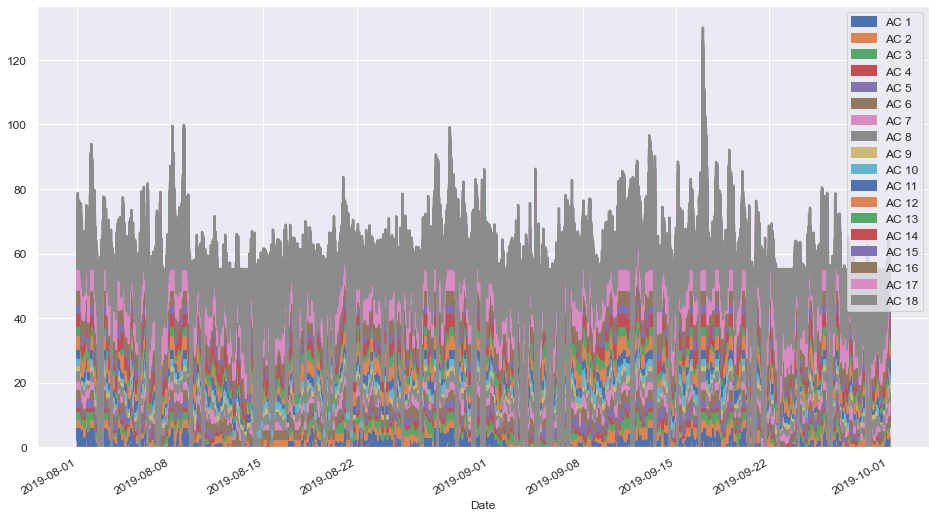

In [208]:
pl = ac_data.plot.area(linewidth= 2, fontsize=12);
pl.set_xlabel('Date');
pl.legend(fontsize=12);

**Here we can observe that this plot is not so much informative and the visualization is also too messy. So we will 
visualize individually.**

**Plotting in respect to month dates.**

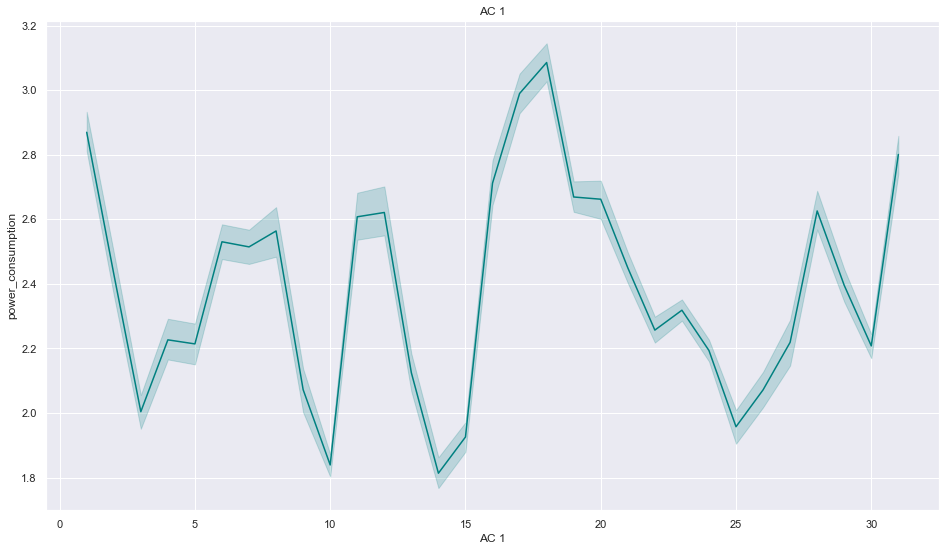

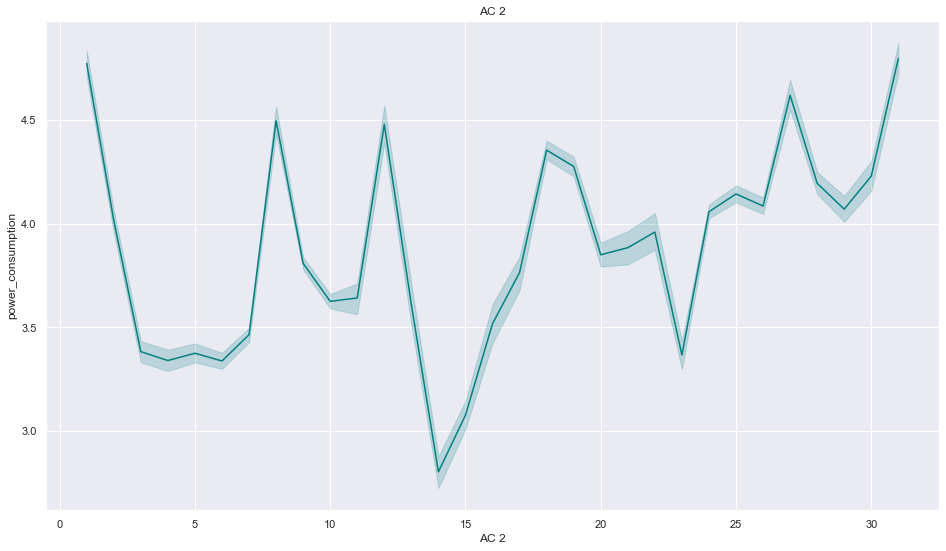

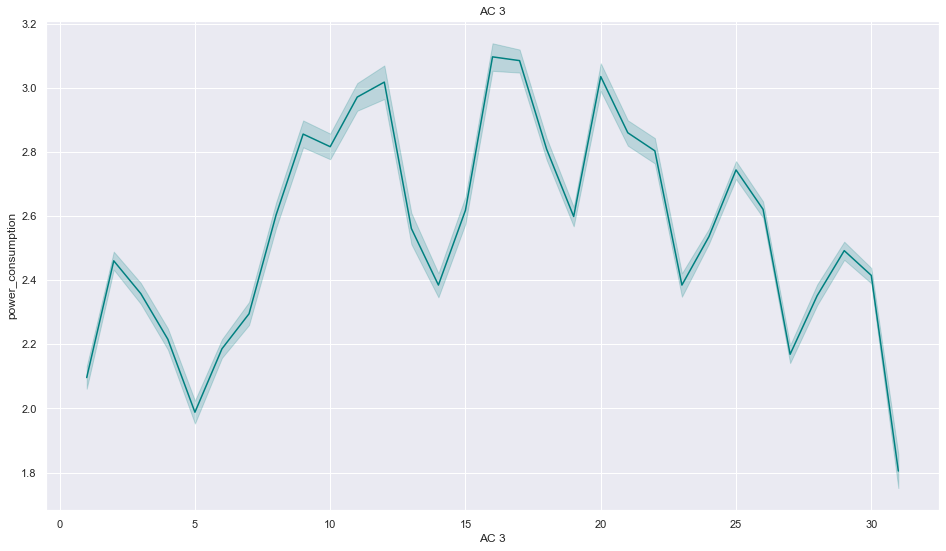

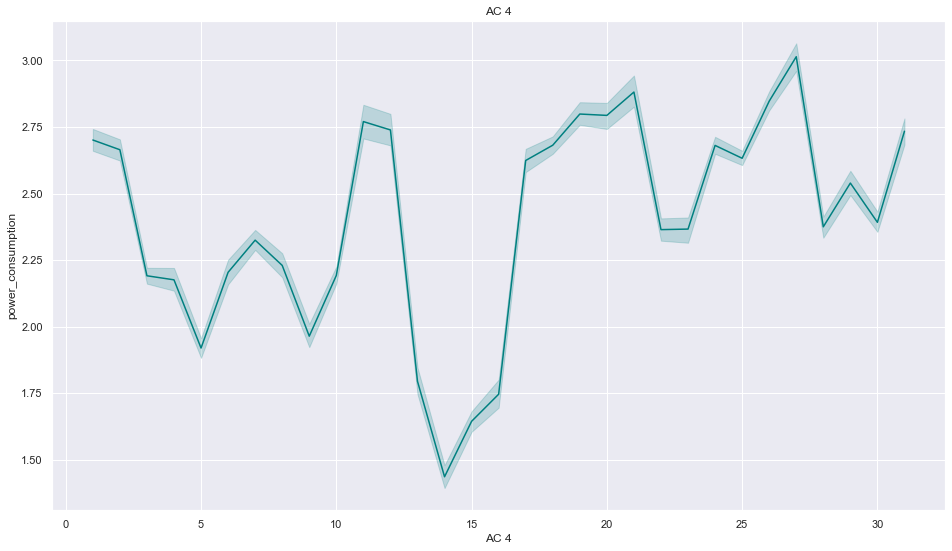

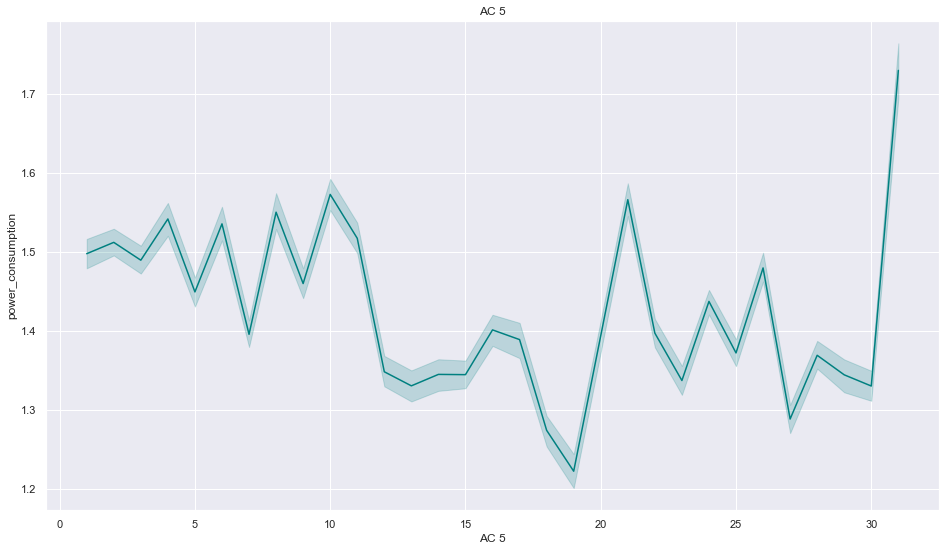

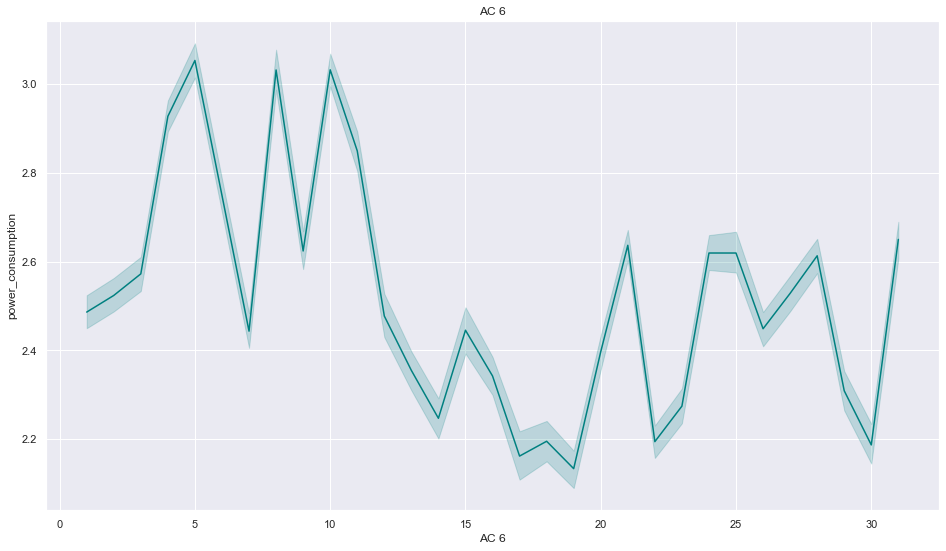

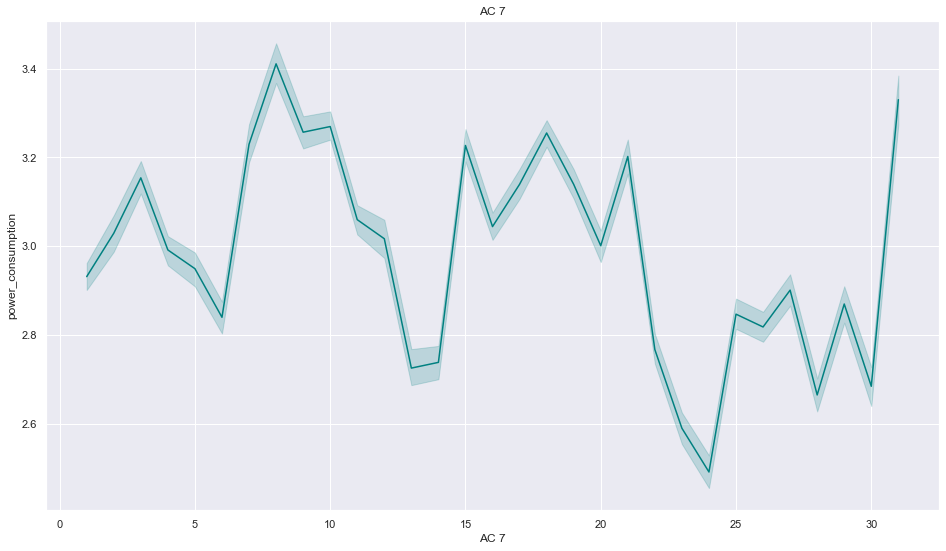

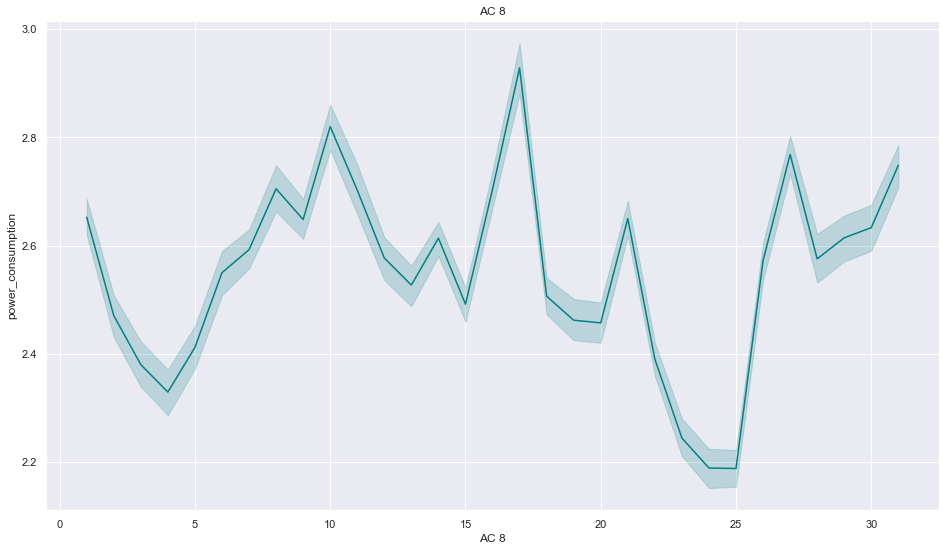

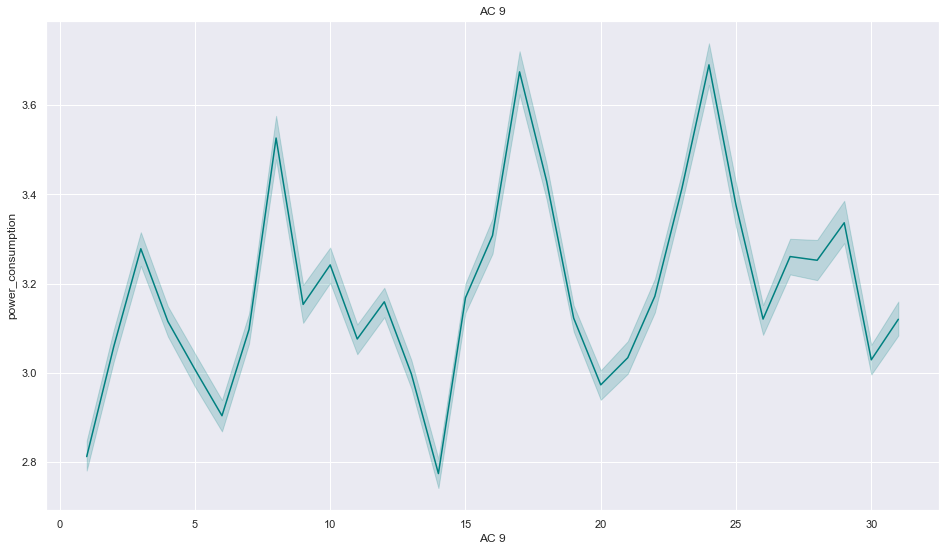

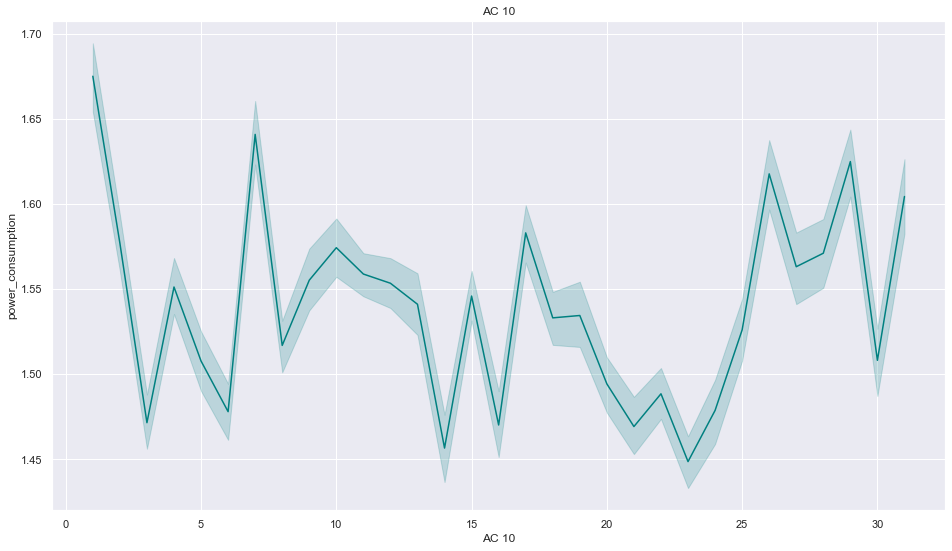

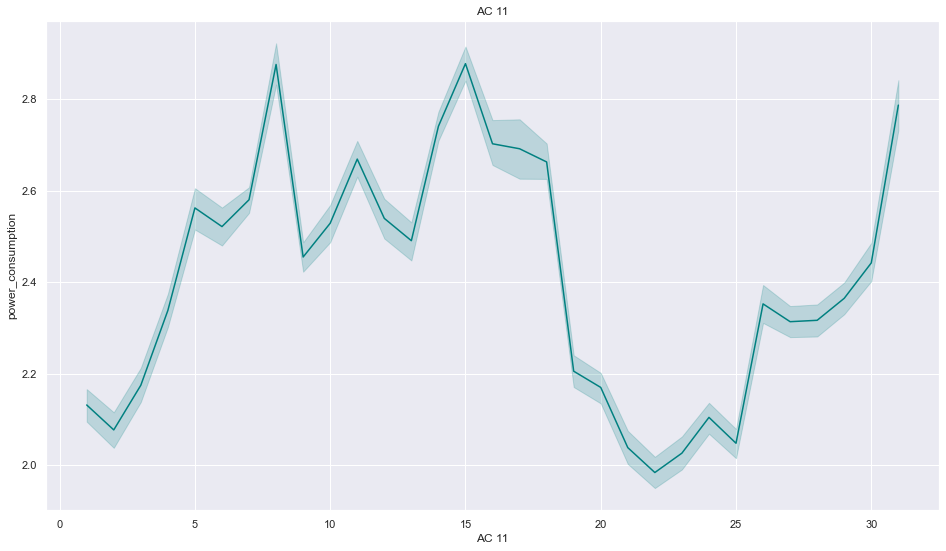

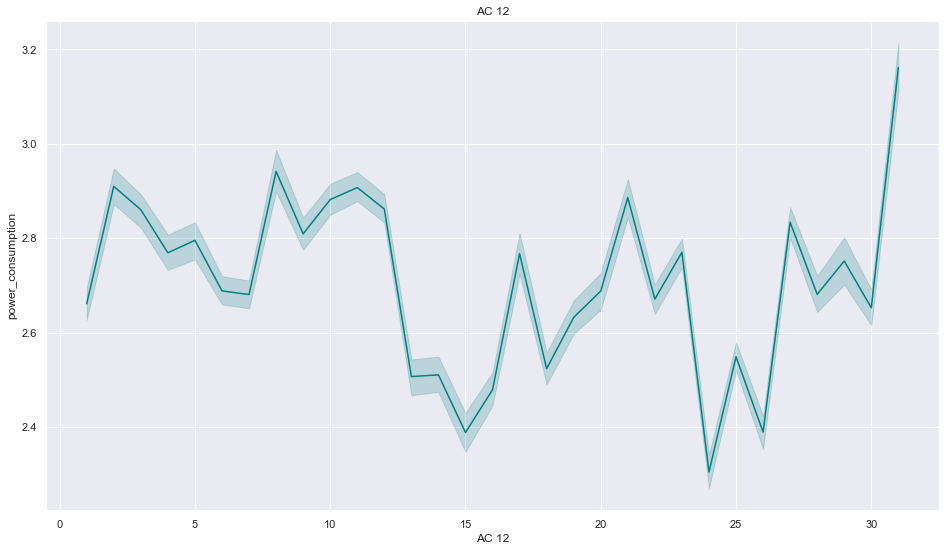

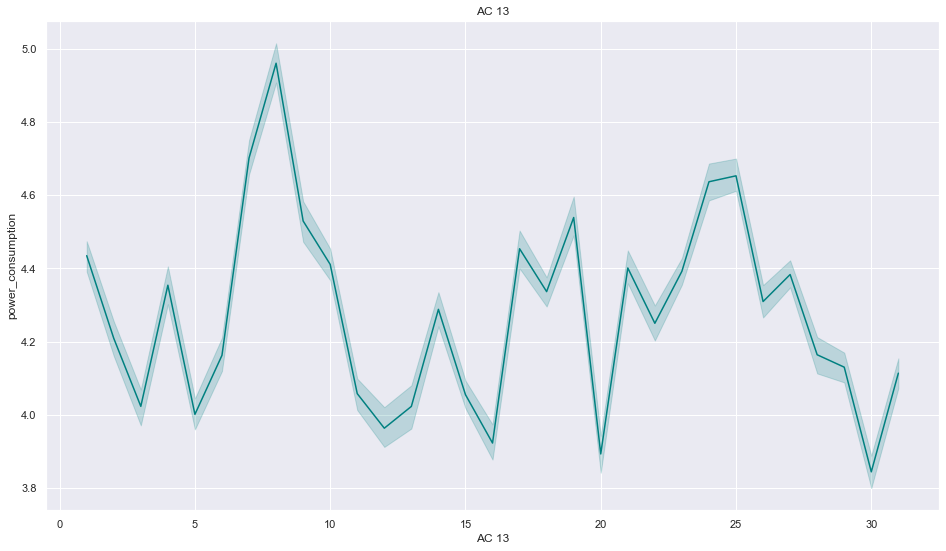

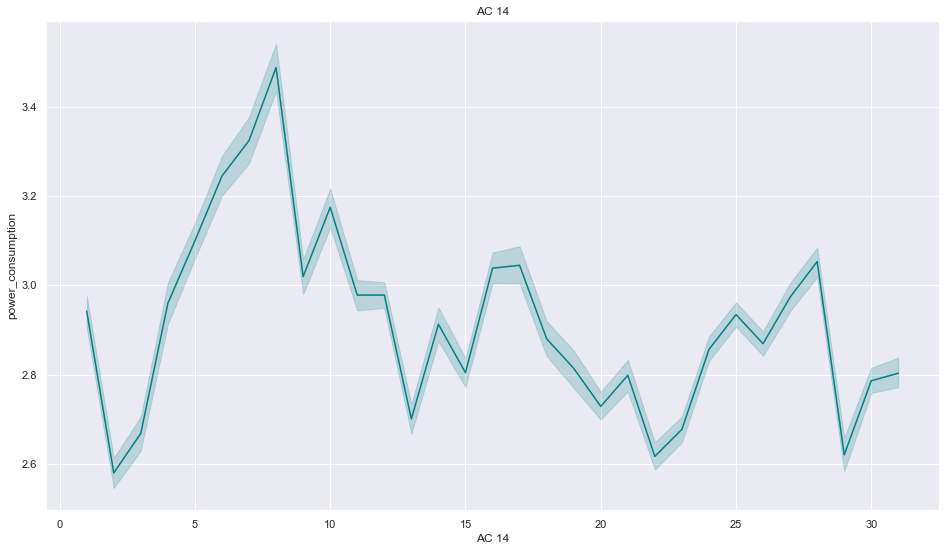

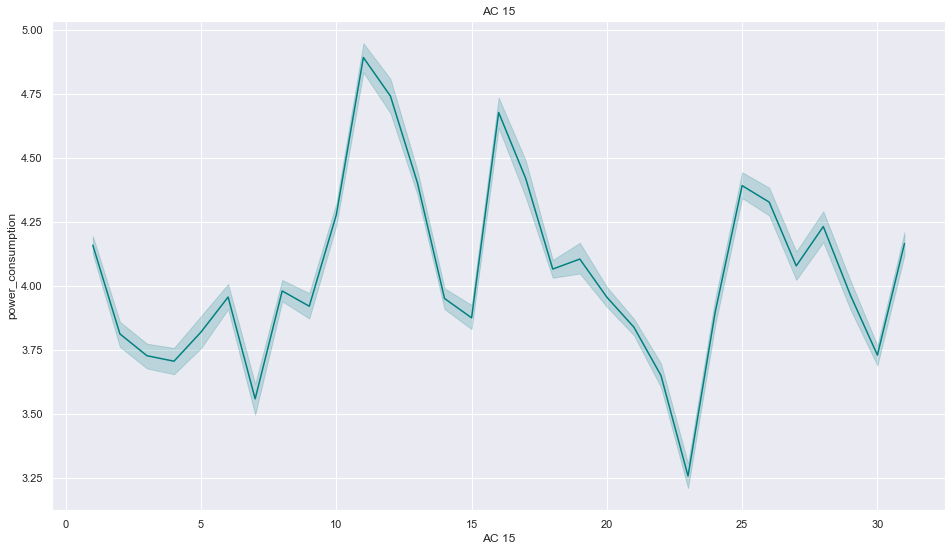

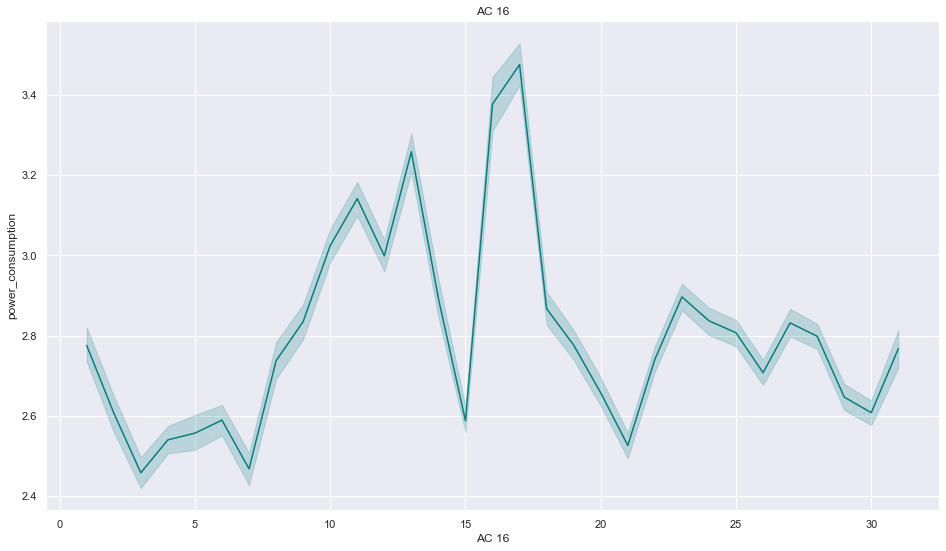

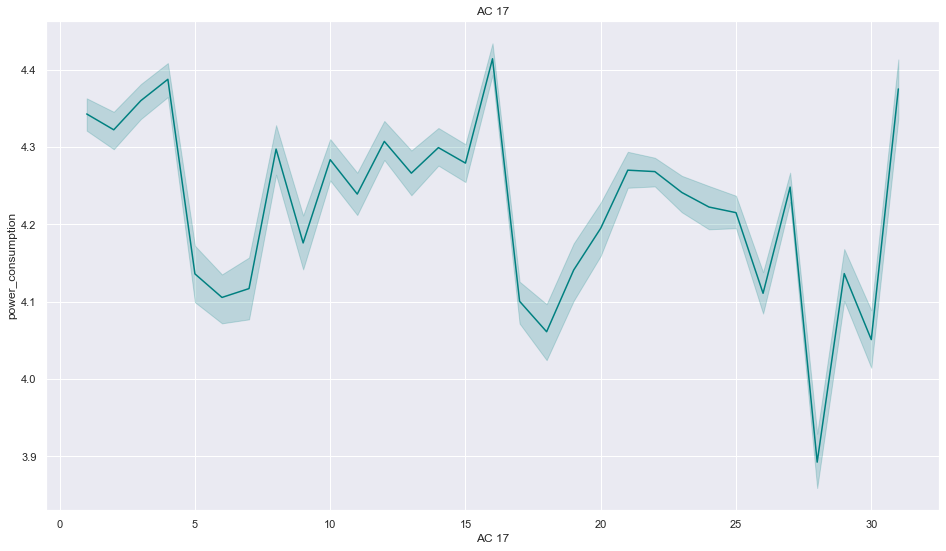

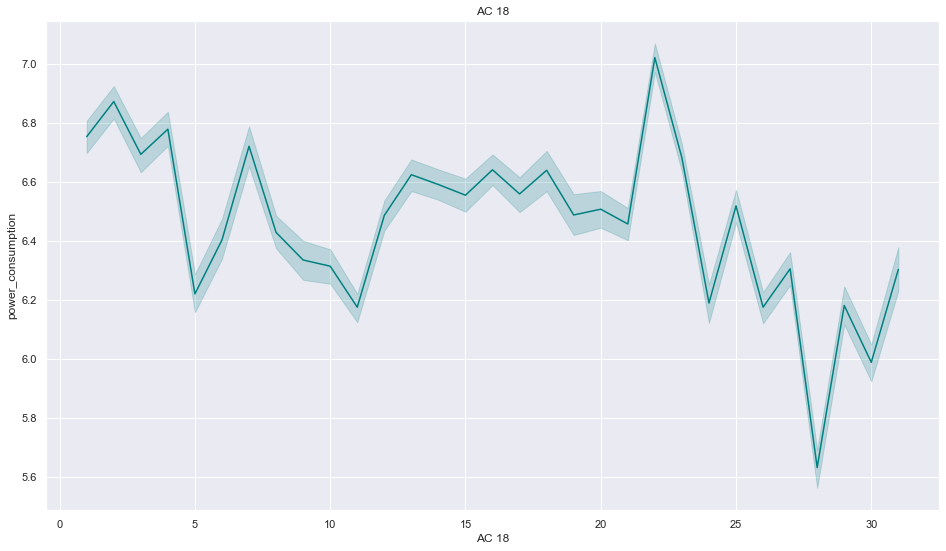

In [209]:
for feature in df2.iloc[: , 0:18] :
    sns.lineplot(x = df2['Days'] , y = df2[feature], color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("power_consumption")
    plt.title(feature)
    plt.show()

**From above we can conclude that most of the AC's consumes less power between 20 - 25 th day of month**

**Plotting with respect to hours**

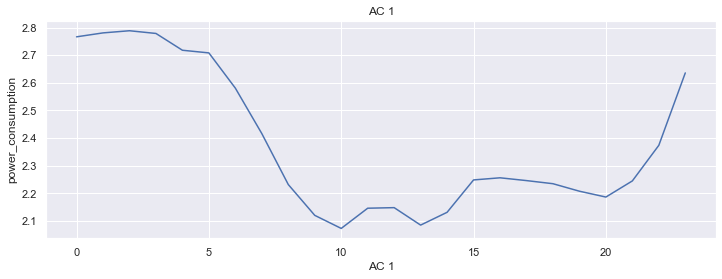

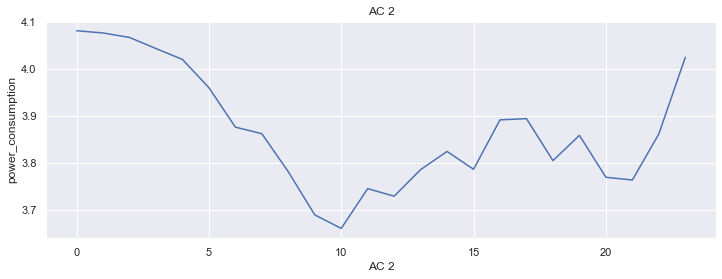

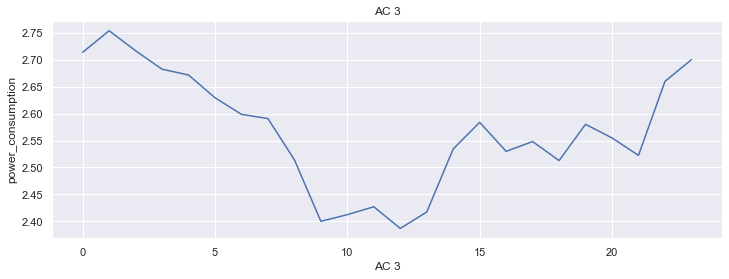

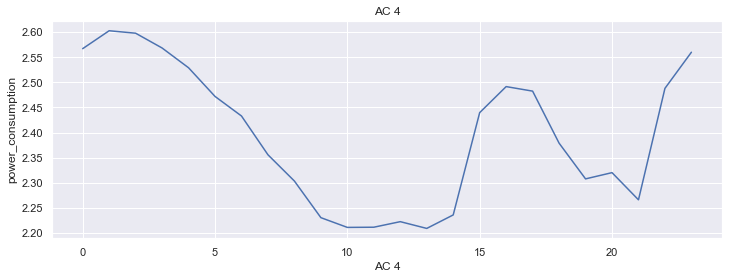

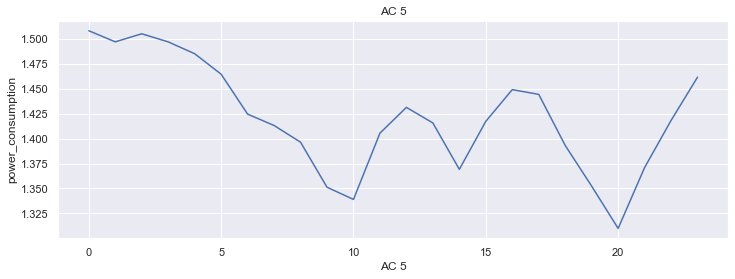

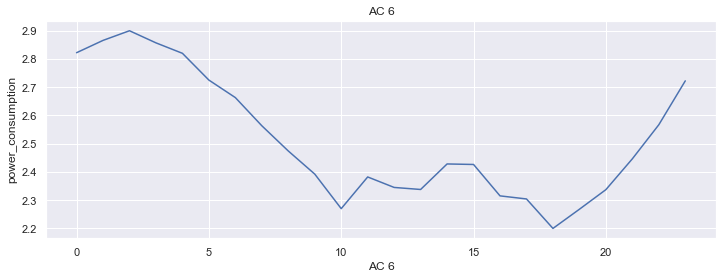

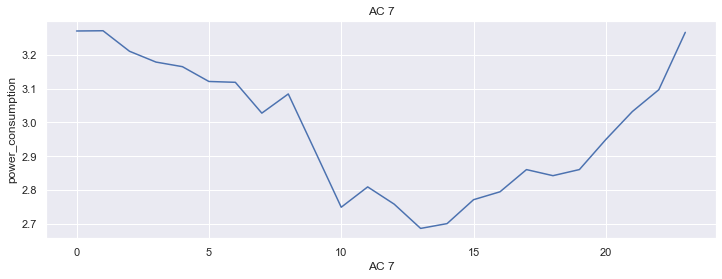

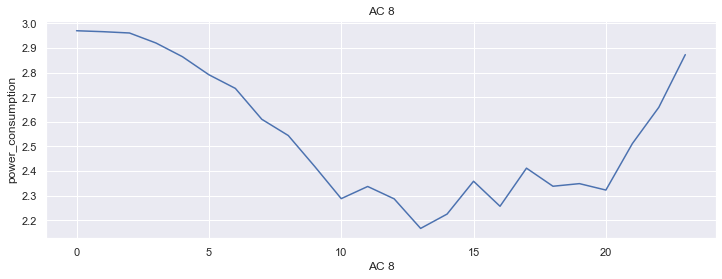

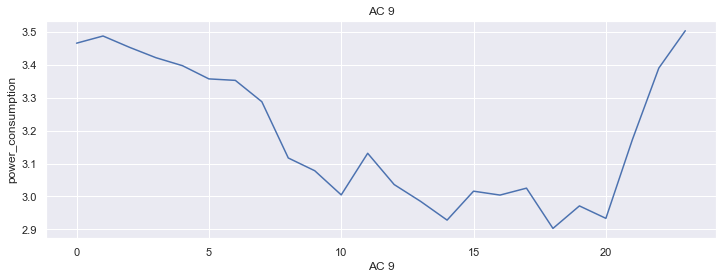

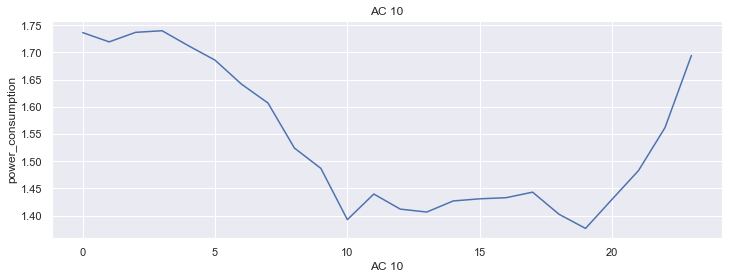

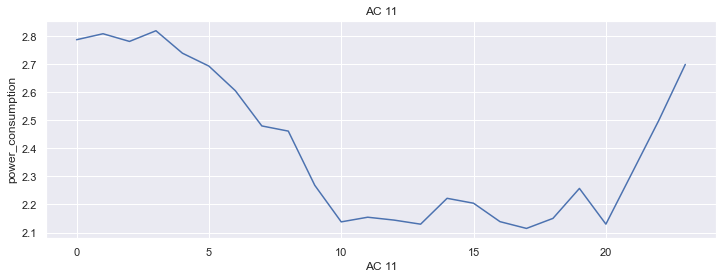

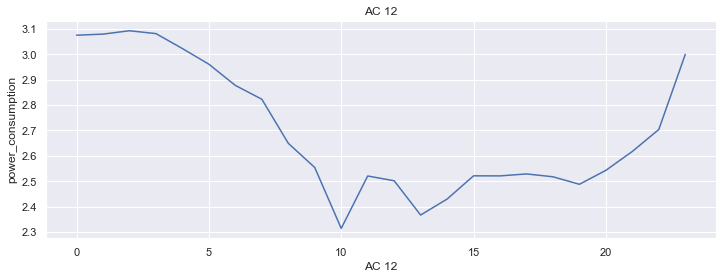

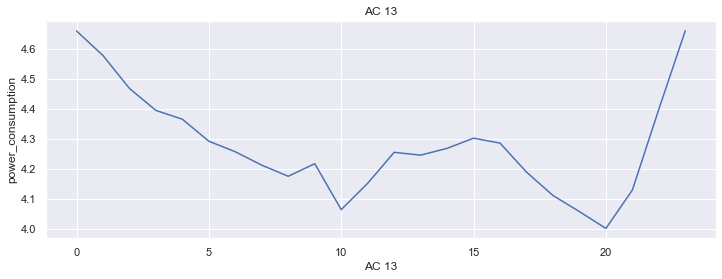

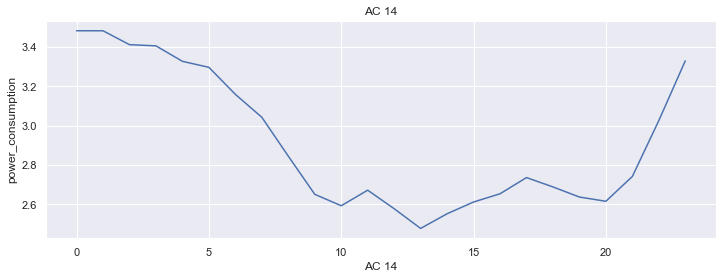

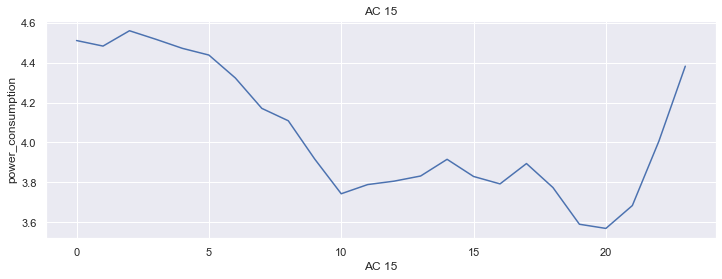

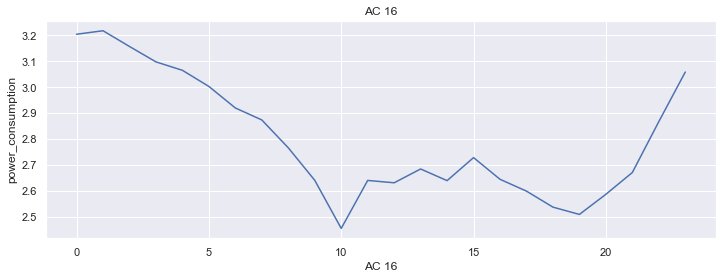

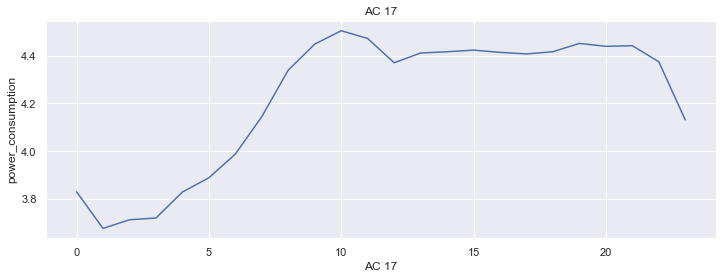

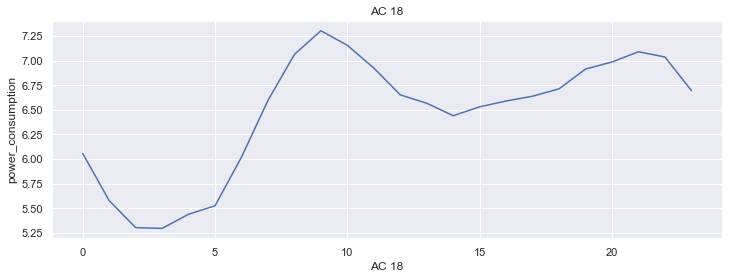

In [210]:
for feature in df2.iloc[: , 0:18] :
    fig, axs = plt.subplots(figsize=(12, 4))
    df2.groupby(df2["Date_Time"].dt.hour)[feature].mean().plot(kind='line', rot=0, ax=axs)
    plt.xlabel(feature)
    plt.ylabel("power_consumption")
    plt.title(feature)
    plt.show()

**From above we can conclude that power consumpton of all the ac's starts to decrease after 3-4 AM and continuously decreases till 10:00 AM. And again starts increasing after 10-11 PM**

**Also almost all the AC's power consumption increses exponentially after 8:00 PM.**

In [211]:
df4 = df2.copy()

**Creating bins of ac datas's**

In [212]:
df4['AC 1'] = pd.cut(df4['AC 1'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 2'] = pd.cut(df4['AC 2'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 3'] = pd.cut(df4['AC 3'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 4'] = pd.cut(df4['AC 4'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 5'] = pd.cut(df4['AC 5'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 6'] = pd.cut(df4['AC 6'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 7'] = pd.cut(df4['AC 7'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 8'] = pd.cut(df4['AC 8'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 9'] = pd.cut(df4['AC 9'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 10'] = pd.cut(df4['AC 10'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 11'] = pd.cut(df4['AC 11'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 12'] = pd.cut(df4['AC 12'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 13'] = pd.cut(df4['AC 13'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 14'] = pd.cut(df4['AC 14'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 15'] = pd.cut(df4['AC 15'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 16'] = pd.cut(df4['AC 16'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 17'] = pd.cut(df4['AC 17'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)
df4['AC 18'] = pd.cut(df4['AC 18'], bins = [0,3, 6, 9 ,12 ], labels = ['low_use', 'med_use', 'high_use', 'extreme_use'], include_lowest = True)

In [213]:
df4.head()

AC 1         AC 2     AC 3     AC 4     AC 5     AC 6     AC 7  \
0  high_use     high_use  low_use  low_use  low_use  med_use  low_use   
1   low_use      med_use  low_use  low_use  low_use  low_use  low_use   
2  high_use     high_use  low_use  low_use  low_use  med_use  low_use   
3   low_use      med_use  low_use  low_use  low_use  low_use  low_use   
4  high_use  extreme_use  low_use  low_use  low_use  med_use  low_use   

       AC 8     AC 9    AC 10  ...    AC 14    AC 15    AC 16    AC 17  \
0   med_use  med_use  low_use  ...  low_use  med_use  med_use  med_use   
1   low_use  med_use  low_use  ...  low_use  med_use  low_use  med_use   
2   med_use  med_use  low_use  ...  low_use  med_use  med_use  med_use   
3   low_use  med_use  low_use  ...  low_use  med_use  low_use  med_use   
4  high_use  med_use  low_use  ...  low_use  med_use  med_use  med_use   

      AC 18           Date_Time Month Days      Time  Hour  
0  high_use 2019-08-01 00:00:00   8.0  1.0  00:00:00   0.0  
1  high_use 2019-08-01 00:01:00   8.0  1.0  00:01:00   0.0  
2  high_use 2019-08-01 00:02:00   8.0  1.0  00:02:00   0.0  
3  high_use 2019-08-01 00:03:00   8.0  1.0  00:03:00   0.0  
4  high_use 2019-08-01 00:04:00   8.0  1.0  00:04:00   0.0  

[5 rows x 23 columns]

**Here we have divided our data of power consumpton in four categories:
> 0-3 - low_use.

> 3-6 - med_use.

> 6-9 - high_use.

> 9-above - extreme_use.


**Similarly we can make bins of our Time feature to fit them in our model**

**Importing Temperature Data of Gurgaon**

In [214]:
gurgaon_temp_data = pd.read_csv('Gurgaon_temperature_Data1.txt')
gurgaon_temp_data

YEAR  MO  DY  HR    T2M
0     2019   8   1   0  28.76
1     2019   8   1   1  28.19
2     2019   8   1   2  27.76
3     2019   8   1   3  27.42
4     2019   8   1   4  27.13
...    ...  ..  ..  ..    ...
1459  2019   9  30  19  26.66
1460  2019   9  30  20  26.06
1461  2019   9  30  21  25.44
1462  2019   9  30  22  24.87
1463  2019   9  30  23  24.33

[1464 rows x 5 columns]

In [215]:
comparing_temperature_data = gurgaon_temp_data.groupby(['MO', 'DY' , 'HR']).mean()
comparing_temperature_data

YEAR    T2M
MO DY HR             
8  1  0   2019  28.76
      1   2019  28.19
      2   2019  27.76
      3   2019  27.42
      4   2019  27.13
...        ...    ...
9  30 19  2019  26.66
      20  2019  26.06
      21  2019  25.44
      22  2019  24.87
      23  2019  24.33

[1464 rows x 2 columns]

In [216]:
comparing_temperature_data = comparing_temperature_data.drop(['YEAR'], axis = 1)

In [217]:
comparing_temperature_data

T2M
MO DY HR       
8  1  0   28.76
      1   28.19
      2   27.76
      3   27.42
      4   27.13
...         ...
9  30 19  26.66
      20  26.06
      21  25.44
      22  24.87
      23  24.33

[1464 rows x 1 columns]

**Making a copy of our Power_Consumption Dataset**

In [218]:
df5 = df2.copy()

In [219]:
df5.head()

AC 1      AC 2      AC 3      AC 4      AC 5      AC 6      AC 7  \
0  7.518632  8.788315  0.000000  0.000000  2.617045  4.079041  2.782276   
1  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
2  7.426114  8.940615  0.000000  0.000000  2.581625  3.781231  2.529366   
3  2.379368  3.868892  2.568411  2.395158  1.421699  2.518138  2.980883   
4  7.052986  9.161103  0.000000  0.000000  2.592095  3.800127  2.332304   

       AC 8      AC 9     AC 10  ...     AC 14     AC 15     AC 16     AC 17  \
0  4.624447  5.222060  2.151238  ...  2.749470  5.417774  4.113460  3.305072   
1  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
2  5.057423  5.349465  2.414715  ...  2.720484  3.302422  3.986483  3.220588   
3  2.548711  3.184382  1.538344  ...  2.917122  4.046283  2.800050  4.218979   
4  6.322521  3.995392  2.237114  ...  2.676861  3.539026  3.797881  3.131560   

      AC 18           Date_Time  Month  Days      Time  Hour  
0  6.735981 2019-08-01 00:00:00    8.0   1.0  00:00:00   0.0  
1  6.462676 2019-08-01 00:01:00    8.0   1.0  00:01:00   0.0  
2  6.379500 2019-08-01 00:02:00    8.0   1.0  00:02:00   0.0  
3  6.462676 2019-08-01 00:03:00    8.0   1.0  00:03:00   0.0  
4  6.363475 2019-08-01 00:04:00    8.0   1.0  00:04:00   0.0  

[5 rows x 23 columns]

**Grouping by our Power_Consumption Data, with respect to Months, Days and  hour**

In [220]:
df5['hour'] = df2['Date_Time'].dt.hour

In [221]:
Grouped_data = df5.groupby(['Month','Days', 'hour']).mean()

In [222]:
Grouped_data['Temperatures'] = comparing_temperature_data['T2M']

In [223]:
Grouped_data

AC 1      AC 2      AC 3      AC 4      AC 5      AC 6  \
Month Days hour                                                               
8.0   1.0  0.0   4.610438  6.185298  2.185133  1.685172  1.826853  3.410558   
           1.0   4.893526  6.163983  2.029271  2.118683  1.829188  3.416443   
           2.0   4.865126  5.991069  2.025367  1.930274  1.706523  3.367171   
           3.0   4.509324  5.896102  2.403309  1.917918  1.756374  3.626486   
           4.0   4.488511  5.584896  2.156701  2.471571  1.646921  3.059369   
...                   ...       ...       ...       ...       ...       ...   
9.0   30.0 19.0  2.361571  4.807397  2.456632  2.071697  1.110350  1.259069   
           20.0  2.313263  5.548230  2.644983  1.851232  1.078286  1.370101   
           21.0  2.314074  4.640763  2.771102  1.930652  1.080406  1.259069   
           22.0  2.298124  5.249672  2.811912  2.028033  1.025412  1.645231   
           23.0  2.293047  4.962548  2.476128  1.890088  1.149684  1.712254   

                     AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
Month Days hour                                                               
8.0   1.0  0.0   2.829112  3.687275  3.418594  2.047171  2.029105  2.357625   
           1.0   2.795582  3.505969  3.119052  2.098645  1.886337  2.293445   
           2.0   2.866972  3.175043  3.150002  2.170821  1.967211  2.309808   
           3.0   3.012834  3.222204  3.014623  2.135090  1.763950  2.185313   
           4.0   2.949708  3.158732  3.283785  2.068001  1.806390  2.268221   
...                   ...       ...       ...       ...       ...       ...   
9.0   30.0 19.0  2.272912  2.410747  2.274308  1.199209  1.916188  2.316839   
           20.0  2.716072  2.473782  2.948468  1.383613  1.768847  2.360328   
           21.0  2.916189  2.346241  3.185780  1.483979  1.996226  2.590563   
           22.0  3.156808  3.190423  4.159250  1.251590  3.197723  2.713565   
           23.0  3.355259  3.279943  3.837577  1.443080  3.554968  3.100051   

                    AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  \
Month Days hour                                                               
8.0   1.0  0.0   4.485904  4.058224  4.849075  3.522068  3.425837  5.817591   
           1.0   4.694302  4.308076  4.994288  3.706138  3.399596  5.216827   
           2.0   4.157251  3.969935  5.130136  4.033609  3.476954  5.206305   
           3.0   4.340205  3.975784  4.491130  3.900776  4.228839  5.180481   
           4.0   4.126380  3.600204  4.684873  3.805983  4.205494  5.200214   
...                   ...       ...       ...       ...       ...       ...   
9.0   30.0 19.0  3.815971  2.497848  3.506361  2.224657  4.437541  6.880576   
           20.0  4.265638  2.709280  3.512588  2.078372  4.439043  6.903059   
           21.0  3.771102  2.420522  3.613837  2.101334  4.391487  6.825166   
           22.0  4.506542  2.551445  3.961418  2.144460  4.054242  6.473555   
           23.0  4.502757  2.609408  4.235021  2.292414  3.663464  5.645724   

                 Hour  Temperatures  
Month Days hour                      
8.0   1.0  0.0    0.0         28.76  
           1.0    1.0         28.19  
           2.0    2.0         27.76  
           3.0    3.0         27.42  
           4.0    4.0         27.13  
...               ...           ...  
9.0   30.0 19.0  19.0         26.66  
           20.0  20.0         26.06  
           21.0  21.0         25.44  
           22.0  22.0         24.87  
           23.0  23.0         24.33  

[1464 rows x 20 columns]

**Above we have successfully appended gurgaon temperature data**

**Now plotting hourly data of every AC with respect to the temperature**

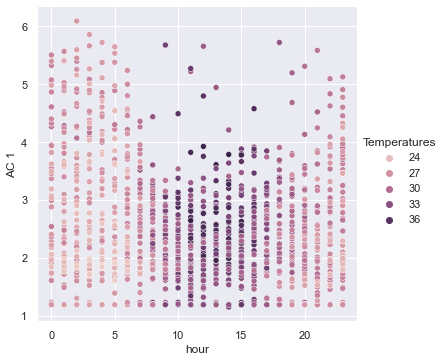

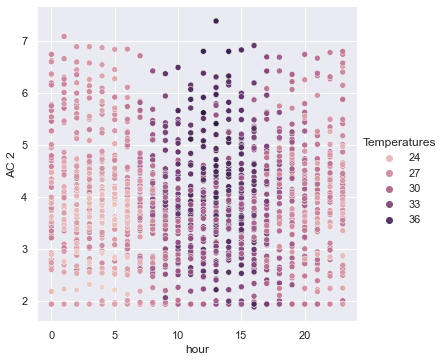

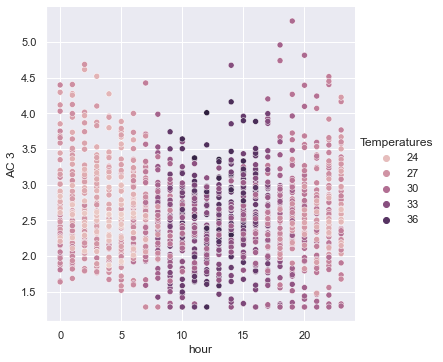

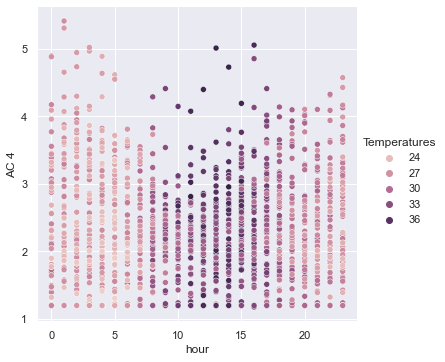

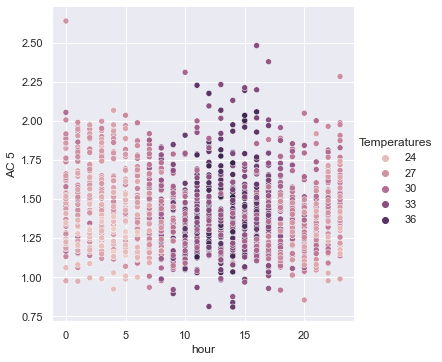

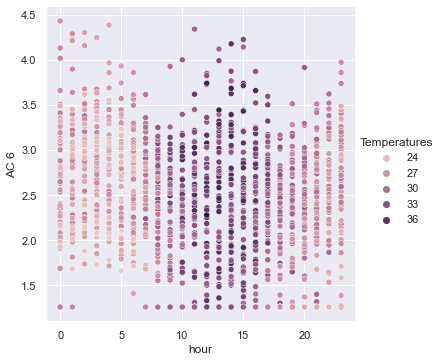

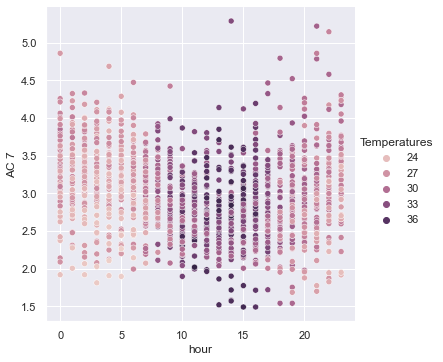

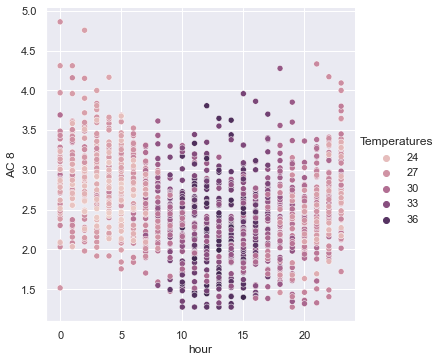

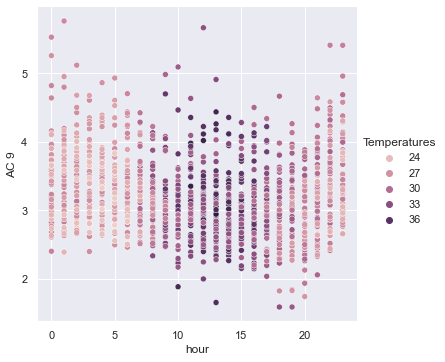

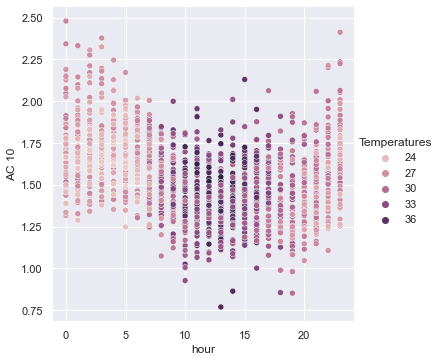

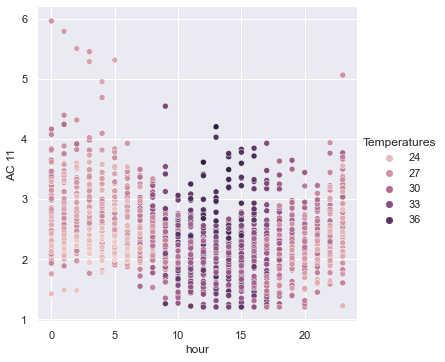

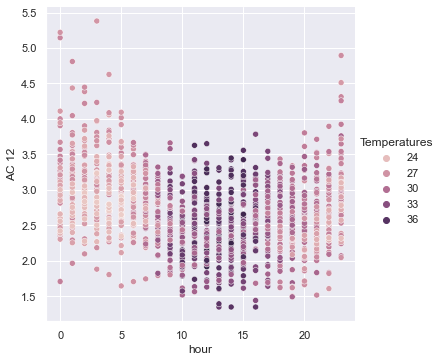

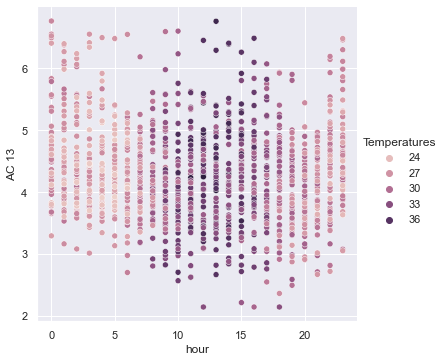

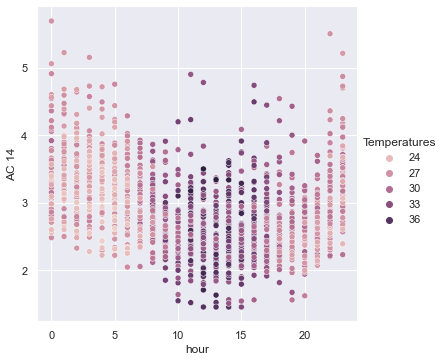

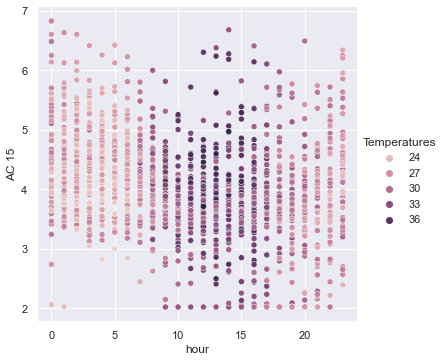

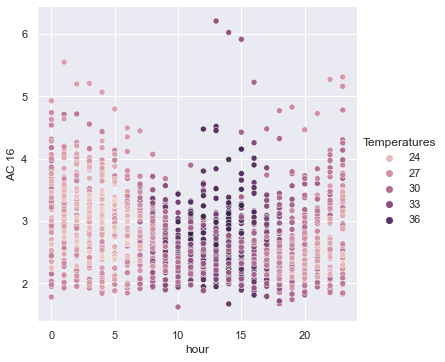

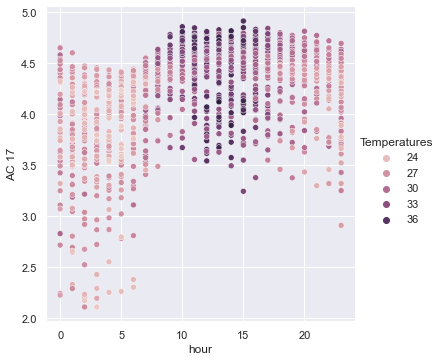

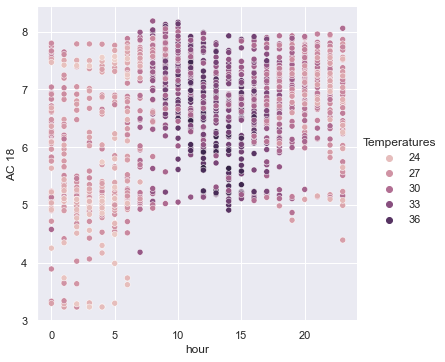

In [224]:
ACs = ['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7','AC 8','AC 9','AC 10','AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']
for i in ACs:
    sns.relplot( x = 'hour' , y = i , hue = 'Temperatures' ,data = comparing_dataset)

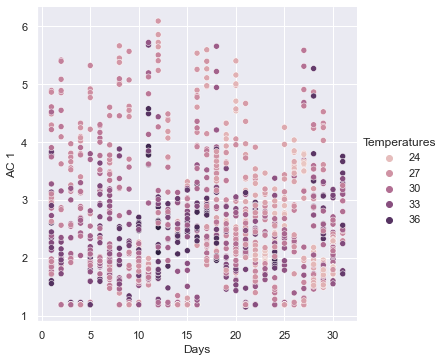

In [225]:
sns.relplot( x = 'Days' , y = 'AC 1' , hue = 'Temperatures' ,data = comparing_dataset)

**Similarly we can create many more plots using this concatenated dataset**

# --------Thank You--------